In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Downloads/test.csv')

In [3]:
df.head()

,id,date_creation,date_update,task_name,task_status,stage,executor_team,task_type,priority_general,deadline,...,sprint_name,sprint_date_start,sprint_date_finish,is_subtask,parent_id,dev_team,dev_team_lead,general_type,product_team,is_last
0,ВВ-36446,2024-01-02 07:14:48,2024-01-02 07:18:12,02.01.24_КМ►При выборе конкретного слота появл...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,2024-02-16 07:14:48,...,NaN,NaN,NaN,0,NaN,NaN,NaN,Задача,NaN,0
1,ВВ-36446,2024-01-02 07:14:48,2024-01-15 02:37:50,02.01.24_КМ►При выборе конкретного слота появл...,Отменено,Отменить задание,Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,2024-02-16 07:14:48,...,NaN,NaN,NaN,0,NaN,NaN,NaN,Задача,NaN,1
2,ВВ-36447,2024-01-02 07:19:47,2024-01-02 07:22:34,02.01.24_КМ► При попытке положить товар в корз...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,4. Низкий,2024-04-01 07:19:47,...,NaN,NaN,NaN,0,NaN,NaN,NaN,Задача,NaN,0
3,ВВ-36447,2024-01-02 07:19:47,2024-01-02 13:05:54,02.01.24_КМ► При попытке положить товар в корз...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,4. Низкий,2024-04-01 07:19:47,...,NaN,NaN,NaN,0,NaN,NaN,NaN,Задача,NaN,0
4,ВВ-36447,2024-01-02 07:19:47,2024-01-09 15:45:55,02.01.24_КМ► При попытке положить товар в корз...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 3,Инцидент - БАГ,4. Низкий,2024-04-01 07:19:47,...,NaN,NaN,NaN,0,NaN,NaN,NaN,Задача,NaN,0


In [4]:
df['date_creation'] = pd.to_datetime(df.date_creation)
df['date_update'] = pd.to_datetime(df.date_update)
df['deadline'] = pd.to_datetime(df.deadline)
df['stage_deadline'] = pd.to_datetime(df.stage_deadline)
df['stage_date'] = pd.to_datetime(df.stage_date)
df['date_export'] = pd.to_datetime(df.date_export)

In [5]:
df['sprint_date_start'] = pd.to_datetime(df.sprint_date_start)
df['sprint_date_finish'] = pd.to_datetime(df.sprint_date_finish)

In [6]:
df['month'] = df.date_creation.dt.to_period('M')

In [7]:
df.dtypes

id                            object
date_creation         datetime64[ns]
date_update           datetime64[ns]
task_name                     object
task_status                   object
stage                         object
executor_team                 object
task_type                     object
priority_general              object
deadline              datetime64[ns]
microservice                  object
admin_team                    object
techsup_team                  object
stage_deadline        datetime64[ns]
stage_date            datetime64[ns]
marks_str                     object
date_export           datetime64[ns]
sprint_name                   object
sprint_date_start     datetime64[ns]
sprint_date_finish    datetime64[ns]
is_subtask                     int64
parent_id                     object
dev_team                     float64
dev_team_lead                float64
general_type                  object
product_team                  object
is_last                        int64
m

In [43]:
df.task_type.value_counts(normalize=True)

task_type
Инцидент - БАГ     0.999925
Инциденты МП ВВ    0.000075
Name: proportion, dtype: float64

In [44]:
df.shape

(13403, 27)

In [46]:
df.id.nunique()
#много повторов в данных

1898

In [81]:
df_unique = df[['date_creation', 'id','']].drop_duplicates(keep='first')
df_unique['date_creation'] = df_unique.date_creation.dt.to_period('M')
linepot_month = df_unique.groupby(['date_creation', ], as_index=False).agg({'id':'count'})

In [86]:
linepot_month

,date_creation,id
0,2024-01,313
1,2024-02,363
2,2024-03,321
3,2024-04,307
4,2024-05,343
5,2024-06,252


<Axes: xlabel='date_creation', ylabel='id'>

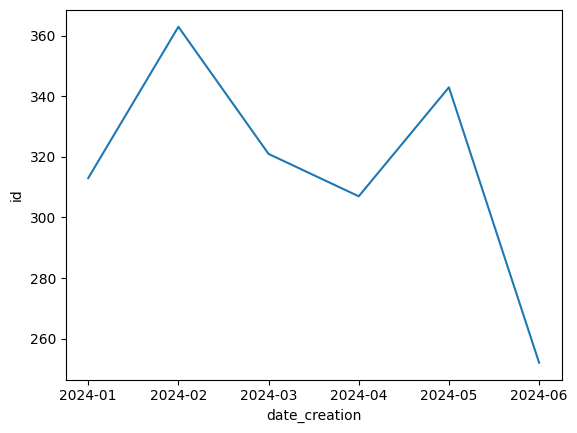

In [88]:
sns.lineplot(linepot_month, x=linepot_month['date_creation'].astype(str), y='id')
#график общего количества багов

In [118]:
#Смотрим статусы закрытия
#df[df.is_last == 1][['month','stage']].value_counts(normalize=True)
task_status = df[df.is_last == 1].groupby(['month','stage'], as_index=False) \
    .agg({'date_creation':'count'}).rename(columns={'date_creation':'task_count'})

In [119]:
month_tasks = task_status.groupby('month', as_index=False).agg({'task_count':'sum'}).rename(columns={'task_count':'total_task'})
task_status = task_status.merge(month_tasks, how='left', on='month')
task_status['task_count'] = task_status.task_count / task_status.total_task * 100
task_status = task_status.rename(columns={'task_count':'task_share'}).drop(columns='total_task')

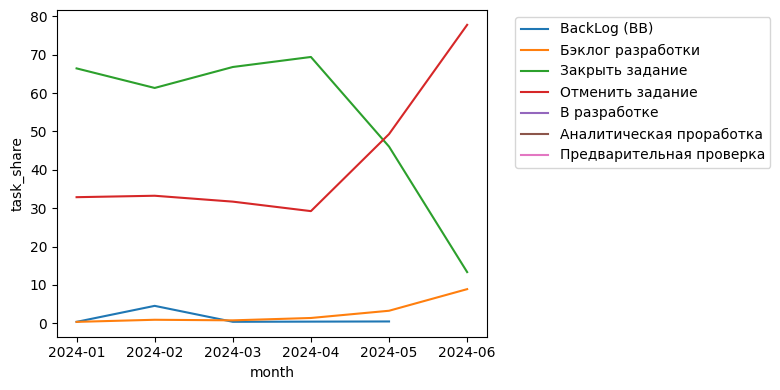

In [208]:
plt.figure(figsize=(8, 4))
sns.lineplot(task_status, x=task_status['month'].astype(str), y='task_share', hue='stage')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [110]:
tasks_rating = df.drop_duplicates(keep='first').groupby(['month','priority_general'], as_index=False) \
    .agg({'date_creation':'count'}).rename(columns={'date_creation':'task_count'})

In [111]:
ratings_total = tasks_rating.groupby('month', as_index=False).agg({'task_count':'sum'}).rename(columns={'task_count':'total_task'})
rating = tasks_rating.merge(ratings_total, how='left', on='month')
rating['task_count'] = rating.task_count / rating.total_task * 100
rating = rating.rename(columns={'task_count':'task_share'}).drop(columns='total_task')

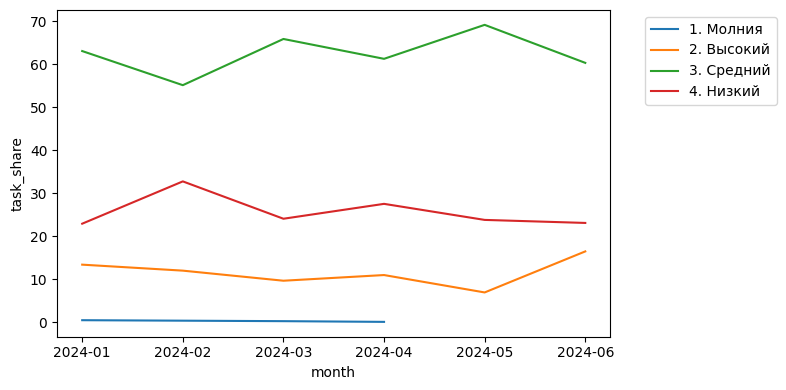

In [210]:
plt.figure(figsize=(8,4))
sns.lineplot(rating, x=rating['month'].astype(str), y='task_share', hue='priority_general')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [214]:
tasks_service = df.drop_duplicates(keep='first').groupby(['month','microservice'], as_index=False) \
    .agg({'date_creation':'count'}).rename(columns={'date_creation':'task_count'})

service_total = tasks_service.groupby('month', as_index=False).agg({'task_count':'sum'}).rename(columns={'task_count':'total_task'})
service = tasks_service.merge(service_total , how='left', on='month')
service['month'] = service.month.astype(str)
service = service.query('task_count > 20')
service['task_count'] = service.task_count / service.total_task * 100
service = service.rename(columns={'task_count':'task_share'}).drop(columns='total_task')
service['task_share'] = service.task_share.round(2)

In [215]:
service.groupby(['month', 'microservice'], as_index=False)

In [216]:
top_services = service.groupby('month').apply(lambda x: x.nlargest(10, 'task_share')).reset_index(drop=True)
#Топ сервисов по доле багов

/var/folders/f5/j2ftfrds7x5gpzzqg4x8t7_r0000gn/T/ipykernel_15751/3239658109.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_services = service.groupby('month').apply(lambda x: x.nlargest(10, 'task_share')).reset_index(drop=True)


In [219]:
top_services[top_services.month =='2024-05']

,month,microservice,task_share
40,2024-05,Розница,15.48
41,2024-05,Лояльность,14.79
42,2024-05,Каталог,8.76
43,2024-05,Рег.учет,7.83
44,2024-05,Поддержка,6.95
45,2024-05,УЗ и Доставка,6.63
46,2024-05,Курьеры,5.93
47,2024-05,Персонал (Ally),4.36
48,2024-05,Сборка,4.36
49,2024-05,Оплата/Платежный,3.99


In [106]:
task_team = df.drop_duplicates(keep='first').groupby(['month','executor_team'], as_index=False) \
    .agg({'date_creation':'count'}).rename(columns={'date_creation':'task_count'})
team_total = task_team.groupby('month', as_index=False).agg({'task_count':'sum'}).rename(columns={'task_count':'total_task'})
team = task_team.merge(team_total , how='left', on='month')
team['month'] = team.month.astype(str)
team['task_count'] = team.task_count / team.total_task * 100
team = team.rename(columns={'task_count':'task_share'}).drop(columns='total_task')

In [218]:
top_teams = team.groupby('month').apply(lambda x: x.nlargest(5, 'task_share')).reset_index(drop=True)
top_teams[top_teams.month == '2024-05']
#Топ команд по нагрузке 

/var/folders/f5/j2ftfrds7x5gpzzqg4x8t7_r0000gn/T/ipykernel_15751/289015752.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_teams = team.groupby('month').apply(lambda x: x.nlargest(5, 'task_share')).reset_index(drop=True)


,month,executor_team,task_share
20,2024-05,Группа FullStack Red Team (Лояльность),9.145299
21,2024-05,Группа ВкусВилл Интегратор. TEAM 6,8.846154
22,2024-05,Группа ВкусВилл Интегратор. TEAM 1,7.136752
23,2024-05,Группа ВкусВилл Разработка. Опер учет Розница ...,4.487179
24,2024-05,Группа ВкусВилл Интегратор. TEAM 3,4.316239


In [126]:
canceled = df[df.stage == 'Отменить задание'].groupby(['month','priority_general'], as_index=False).agg({'date_creation':'count'}).rename(columns={'date_creation':'task_count'})
canceled_tt = canceled.groupby('month', as_index=False).agg({'task_count':'sum'}).rename(columns={'task_count':'total_task'})
cancel = canceled.merge(canceled_tt , how='left', on='month')
cancel['month'] = cancel.month.astype(str)
cancel['task_count'] = cancel.task_count / cancel.total_task * 100
cancel = cancel.rename(columns={'task_count':'task_share'}).drop(columns='total_task')

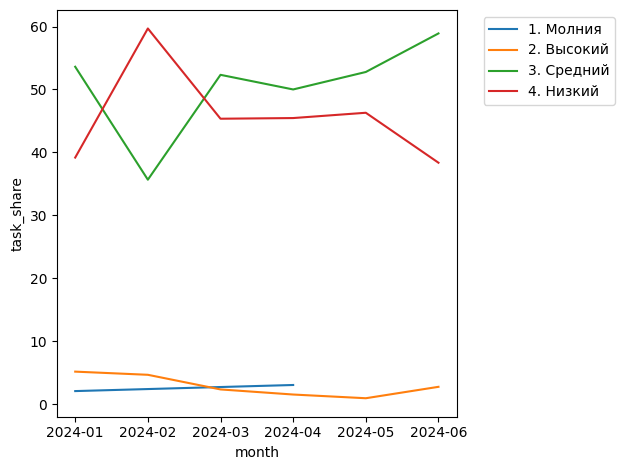

In [128]:
sns.lineplot(cancel, x='month', y='task_share', hue='priority_general')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [132]:
closed = df[df.stage == 'Закрыть задание'].groupby(['month','priority_general'], as_index=False).agg({'date_creation':'count'}).rename(columns={'date_creation':'task_count'})
closed_tt = closed.groupby('month', as_index=False).agg({'task_count':'sum'}).rename(columns={'task_count':'total_task'})
close = closed.merge(closed_tt , how='left', on='month')
close['month'] = close.month.astype(str)
close['task_count'] = close.task_count / close.total_task * 100
close = close.rename(columns={'task_count':'task_share'}).drop(columns='total_task')

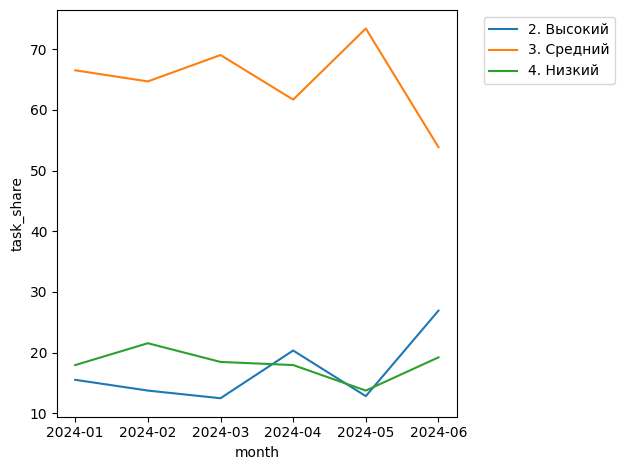

In [133]:
sns.lineplot(close, x='month', y='task_share', hue='priority_general')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [155]:
#df[(df.stage == 'Закрыть задание') & (df.is_last== False)]
df[df.id == 'ВВ-71386']

,id,date_creation,date_update,task_name,task_status,stage,executor_team,task_type,priority_general,deadline,...,sprint_date_start,sprint_date_finish,is_subtask,parent_id,dev_team,dev_team_lead,general_type,product_team,is_last,month
13317,ВВ-71386,2024-06-26 11:45:02,2024-06-26 11:58:51,"Ошибка при проведении документа ""Начисление за...",В работе,Бэклог разработки,Группа ВкусВилл Разработка ЗУП,Инцидент - БАГ,NaN,NaT,...,NaT,NaT,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13318,ВВ-71386,2024-06-26 11:45:02,2024-06-26 12:45:54,"Ошибка при проведении документа ""Начисление за...",В работе,Проверка кода,Группа ВкусВилл Разработка. Интеграция ЗУП,Инцидент - БАГ,2. Высокий,2024-07-10 11:45:02,...,NaT,NaT,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13319,ВВ-71386,2024-06-26 11:45:02,2024-06-26 14:54:28,"Ошибка при проведении документа ""Начисление за...",В работе,Создание заявки на перенос в продуктив,NaN,Инцидент - БАГ,2. Высокий,2024-07-10 11:45:02,...,NaT,NaT,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13320,ВВ-71386,2024-06-26 11:45:02,2024-06-26 15:06:28,"Ошибка при проведении документа ""Начисление за...",В работе,Сдать работу заказчику,Группа ВкусВилл Разработка ЗУП,Инцидент - БАГ,2. Высокий,2024-07-10 11:45:02,...,NaT,NaT,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13321,ВВ-71386,2024-06-26 11:45:02,2024-06-27 13:20:13,"Ошибка при проведении документа ""Начисление за...",Закрыто,Закрыть задание,Группа ВкусВилл Разработка ЗУП,Инцидент - БАГ,2. Высокий,2024-07-10 11:45:02,...,NaT,NaT,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13322,ВВ-71386,2024-06-26 11:45:02,2024-06-27 14:52:33,"Ошибка при проведении документа ""Начисление за...",Закрыто,Закрыть задание,Группа ВкусВилл Разработка ЗУП,Инцидент - БАГ,2. Высокий,2024-07-10 11:45:02,...,NaT,NaT,0,NaN,NaN,NaN,Задача,NaN,1,2024-06


In [182]:
time_df = df[(df.is_last == True) & (df.stage == 'Закрыть задание')][['id', 'date_creation', 'date_update', 'priority_general', 'deadline','month']]
time_df['time_spent'] = time_df.date_update - time_df.date_creation
time_df['over_deadline'] = np.where(time_df.date_update > time_df.deadline, 1, 0)

In [196]:
time_pivot = time_df.groupby(['month','priority_general'], as_index=False).agg({'time_spent':'mean','over_deadline':'sum'})
time_pivot['month'] = time_pivot.month.astype(str)
time_tt = time_pivot.groupby('month', as_index=False).agg({'over_deadline':'sum'}).rename(columns={'over_deadline':'total'})
time = time_pivot.merge(time_tt , how='left', on='month')
time['over_deadline'] = time.over_deadline / time.total *100
time = time.rename(columns={'over_deadline':'over_deadline_share'}).drop(columns='total')

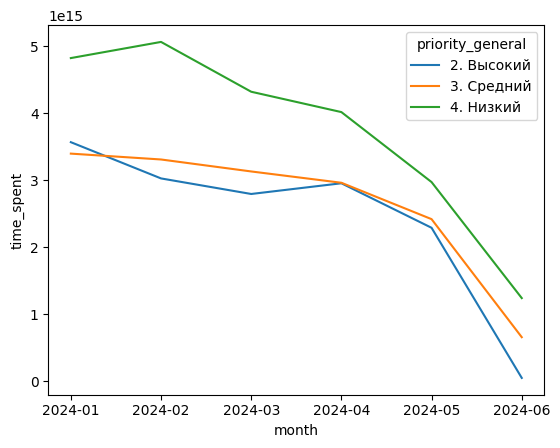

In [253]:
ax = sns.lineplot(time, x='month', y='time_spent', hue='priority_general')
ax.invert_yaxis()
plt.show()

<Axes: xlabel='month', ylabel='over_deadline_share'>

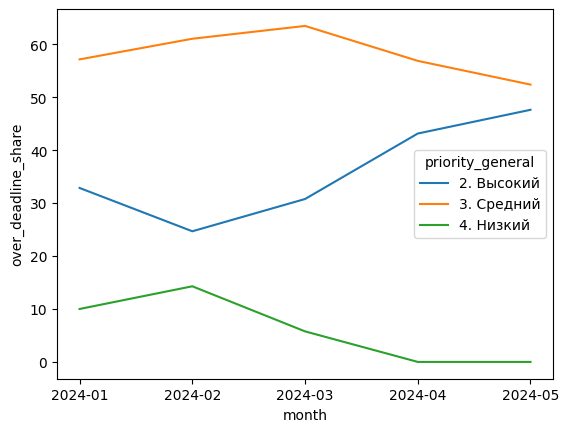

In [198]:
sns.lineplot(time, x='month', y='over_deadline_share', hue='priority_general')

In [239]:
team_cancel = df[(df.stage == 'Отменить задание')&(df.month < '2024-07')&(df.month >= '2024-04')].groupby(['month','executor_team'], as_index=False). \
    agg({'id':'nunique'})
z = team_cancel[team_cancel.id > 4]

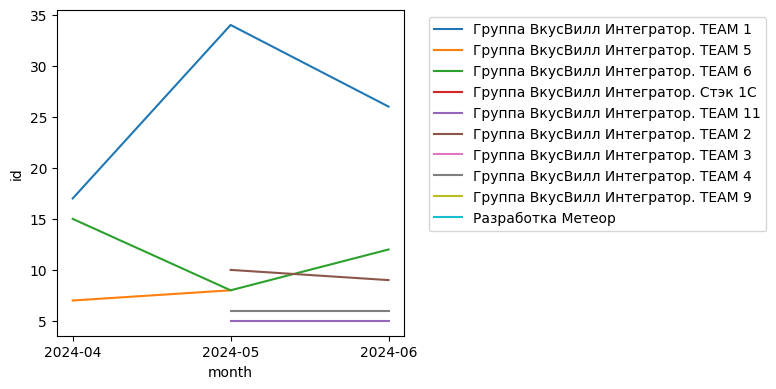

In [243]:
plt.figure(figsize=(8,4))
sns.lineplot(z, x=z.month.astype(str), y='id', hue='executor_team')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [251]:
values = df[df.stage == 'Отменить задание'].id

df[(df.executor_team == 'Группа ВкусВилл Интегратор. TEAM 1')& (df.month == '2024-06') & (df.id.isin(values))].select_dtypes(exclude='datetime')

,id,task_name,task_status,stage,executor_team,task_type,priority_general,microservice,admin_team,techsup_team,marks_str,sprint_name,is_subtask,parent_id,dev_team,dev_team_lead,general_type,product_team,is_last,month
12164,ВВ-67475,03.06.2024_КМ_► Дубли в логах universal_logs,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Аналитика (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
12165,ВВ-67475,03.06.2024_КМ_► Дубли в логах universal_logs,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Аналитика (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
12167,ВВ-67475,03.06.2024_КМ_► Дубли в логах universal_logs в...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Аналитика (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
12170,ВВ-67475,03.06.2024_КМ_► Дубли в логах universal_logs в...,Отменено,Отменить задание,Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Аналитика (ВВ),Группа FullStack White Team (Фронт),Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,1,2024-06
12212,ВВ-67552,03.06.2024_КМ_► При оценке заказа в МП звёздоч...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,МП,Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,ВВ-70982,24.06.2024_КМ_► Отсутствует яндекс клавиатура ...,Отменено,Отменить задание,Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,МП,"Группа FullStack Deep Purple Team (Гео,Серв,Ак...",Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,1,2024-06
13273,ВВ-71001,24.06.2024_КМ_► В истории операций при выводе ...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Поддержка,Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13274,ВВ-71001,24.06.2024_КМ_► В истории операций при выводе ...,В работе,BackLog (ВВ),Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Поддержка,Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,0,2024-06
13275,ВВ-71001,24.06.2024_КМ_► В истории операций при выводе ...,Отменено,Отменить задание,Группа ВкусВилл Интегратор. TEAM 1,Инцидент - БАГ,3. Средний,Поддержка,Группа ВкусВилл Интегратор. TEAM 1,Группа ВкусВилл Интегратор. TEAM 1,Средний приоритет,NaN,0,NaN,NaN,NaN,Задача,NaN,1,2024-06
